## 第零步：分析库导入与分析目标设置
为了更方便地进行数据处理与分析，我们定义了一个基类`DataframeAnalysis`,将输入数据统一处理成`pandas.DataFrame`格式.

目前支持的数据格式有：
- `csv`
- `xlsx`
- `parquet`

输入参数有：
- `root_path`: 所有数据存放的根路径
- `data_path`: 各个数据集在根路径下的子路径

In [1]:
pwd

'/Users/yumeng/Desktop/Data-Process-Library/example/XiexinForecasting/PhotovoltaicPower'

In [2]:
from Analysis.DataframeAnalysis import DataframeAnalysis
import plotly.express as px
import pandas as pd
import os
import plotly.graph_objects as go
# 导入中冶赛迪高炉应用数据
root_path = '/Users/yumeng/Desktop/data/Xiexindata/photovoltaic_power_plant_data'
data_path = 'ps_id_141571_merged.csv'
df = pd.read_csv(os.path.join(root_path, data_path), encoding='utf-8')
DA = DataframeAnalysis(dataFrame=df)
DA.root_path = root_path
DA.data_path = data_path

DataAnalysis loading data from DataFrame with shape: (73474, 30)


In [3]:
# 获得所有列名
DA.df_raw.columns

Index(['sn', 'ts', 'er', 'pac', 'lng', 'lat', 'roof_type', 'angle',
       'temperature_2m', 'relative_humidity_2m', 'dew_point_2m',
       'pressure_msl', 'surface_pressure', 'precipitation_probability',
       'cloud_cover', 'cloud_cover_low', 'cloud_cover_mid', 'cloud_cover_high',
       'shortwave_radiation', 'direct_radiation', 'direct_normal_irradiance',
       'diffuse_radiation', 'wind_speed_10m', 'wind_speed_80m',
       'wind_speed_120m', 'wind_direction_10m', 'wind_direction_80m',
       'wind_direction_120m', 'variable_date', 'full_time'],
      dtype='object')

In [4]:
DA.df_raw

sn                   ts  er   pac         lng  \
0      GCBZT03300A231207120  2024-05-01 10:05:00 NaN  2.18  109.174126   
1      GCBZT03300A231207120  2024-05-01 10:10:00 NaN  2.21  109.174126   
2      GCBZT03300A231207120  2024-05-01 10:15:00 NaN  1.37  109.174126   
3      GCBZT03300A231207120  2024-05-01 10:20:00 NaN  0.69  109.174126   
4      GCBZT03300A231207120  2024-05-01 10:25:00 NaN  0.22  109.174126   
...                     ...                  ...  ..   ...         ...   
73469  GCBZT03300A231207120  2025-05-10 19:00:00 NaN  0.00  109.174126   
73470  GCBZT03300A231207120  2025-05-10 19:05:00 NaN  0.00  109.174126   
73471  GCBZT03300A231207120  2025-05-10 19:10:00 NaN  0.00  109.174126   
73472  GCBZT03300A231207120  2025-05-10 19:15:00 NaN  0.00  109.174126   
73473  GCBZT03300A231207120  2025-05-10 19:20:00 NaN  0.00  109.174126   

             lat roof_type  angle  temperature_2m  relative_humidity_2m  ...  \
0      22.348265     阳光棚双坡    5.0             NaN                   NaN  ...   
1      22.348265     阳光棚双坡    5.0             NaN                   NaN  ...   
2      22.348265     阳光棚双坡    5.0         24.0457               74.4943  ...   
3      22.348265     阳光棚双坡    5.0             NaN                   NaN  ...   
4      22.348265     阳光棚双坡    5.0             NaN                   NaN  ...   
...          ...       ...    ...             ...                   ...  ...   
73469  22.348265     阳光棚双坡    5.0         24.1031               96.4388  ...   
73470  22.348265     阳光棚双坡    5.0             NaN                   NaN  ...   
73471  22.348265     阳光棚双坡    5.0             NaN                   NaN  ...   
73472  22.348265     阳光棚双坡    5.0         23.9318               96.4312  ...   
73473  22.348265     阳光棚双坡    5.0             NaN                   NaN  ...   

       direct_normal_irradiance  diffuse_radiation  wind_speed_10m  \
0                           NaN                NaN             NaN   
1                           NaN                NaN             NaN   
2                      498.8719           222.3747          5.8085   
3                           NaN                NaN             NaN   
4                           NaN                NaN             NaN   
...                         ...                ...             ...   
73469                    2.6063             3.1082          2.3410   
73470                       NaN                NaN             NaN   
73471                       NaN                NaN             NaN   
73472                    0.8688             1.0361          2.6595   
73473                       NaN                NaN             NaN   

       wind_speed_80m  wind_speed_120m  wind_direction_10m  \
0                 NaN              NaN                 NaN   
1                 NaN              NaN                 NaN   
2              7.8259           8.2942             23.5870   
3                 NaN              NaN                 NaN   
4                 NaN              NaN                 NaN   
...               ...              ...                 ...   
73469          4.2187           4.7341             34.1636   
73470             NaN              NaN                 NaN   
73471             NaN              NaN                 NaN   
73472          4.7508           5.3217             32.4313   
73473             NaN              NaN                 NaN   

       wind_direction_80m  wind_direction_120m        variable_date  \
0                     NaN                  NaN                  NaN   
1                     NaN                  NaN                  NaN   
2                 24.7734              25.2321  2024-05-01 10:15:00   
3                     NaN                  NaN                  NaN   
4                     NaN                  NaN                  NaN   
...                   ...                  ...                  ...   
73469             36.7452              37.3933  2025-05-10 19:00:00   
73470                

In [5]:
DA.plot_column_plotly(columns=['pac'], start_point=0, length=100000)

## 第一步：对齐时间戳
按照功率数据的标准，插值为5min频率

In [6]:
#检查full_time是否全是5min间隔


import pandas as pd

# 确保 full_time 为 datetime 类型
df['full_time'] = pd.to_datetime(df['full_time'])

# 创建严格的 5 分钟间隔时间戳，起止时间取自原 full_time 范围
new_full_time = pd.date_range(
    start=df['full_time'].min(),
    end=df['full_time'].max(),
    freq='5min'  # 推荐用 '5min' 替代 '5T'
)

# 替换旧的 full_time 或创建一个新列
df = df.set_index('full_time')         # 将 full_time 设为索引
df = df.reindex(new_full_time)         # 按严格 5min 间隔重建索引
df.index.name = 'full_time'            # 恢复索引名
df = df.reset_index()                  # 如需使用为普通列

# 保存回 DA.df_raw
DA.df_raw = df



DA.df_raw

full_time                    sn                   ts  er  \
0      2024-05-01 10:05:00  GCBZT03300A231207120  2024-05-01 10:05:00 NaN   
1      2024-05-01 10:10:00  GCBZT03300A231207120  2024-05-01 10:10:00 NaN   
2      2024-05-01 10:15:00  GCBZT03300A231207120  2024-05-01 10:15:00 NaN   
3      2024-05-01 10:20:00  GCBZT03300A231207120  2024-05-01 10:20:00 NaN   
4      2024-05-01 10:25:00  GCBZT03300A231207120  2024-05-01 10:25:00 NaN   
...                    ...                   ...                  ...  ..   
107819 2025-05-10 19:00:00  GCBZT03300A231207120  2025-05-10 19:00:00 NaN   
107820 2025-05-10 19:05:00  GCBZT03300A231207120  2025-05-10 19:05:00 NaN   
107821 2025-05-10 19:10:00  GCBZT03300A231207120  2025-05-10 19:10:00 NaN   
107822 2025-05-10 19:15:00  GCBZT03300A231207120  2025-05-10 19:15:00 NaN   
107823 2025-05-10 19:20:00  GCBZT03300A231207120  2025-05-10 19:20:00 NaN   

         pac         lng        lat roof_type  angle  temperature_2m  ...  \
0       2.18  109.174126  22.348265     阳光棚双坡    5.0             NaN  ...   
1       2.21  109.174126  22.348265     阳光棚双坡    5.0             NaN  ...   
2       1.37  109.174126  22.348265     阳光棚双坡    5.0         24.0457  ...   
3       0.69  109.174126  22.348265     阳光棚双坡    5.0             NaN  ...   
4       0.22  109.174126  22.348265     阳光棚双坡    5.0             NaN  ...   
...      ...         ...        ...       ...    ...             ...  ...   
107819  0.00  109.174126  22.348265     阳光棚双坡    5.0         24.1031  ...   
107820  0.00  109.174126  22.348265     阳光棚双坡    5.0             NaN  ...   
107821  0.00  109.174126  22.348265     阳光棚双坡    5.0             NaN  ...   
107822  0.00  109.174126  22.348265     阳光棚双坡    5.0         23.9318  ...   
107823  0.00  109.174126  22.348265     阳光棚双坡    5.0             NaN  ...   

        direct_radiation  direct_normal_irradiance  diffuse_radiation  \
0                    NaN                       NaN                NaN   
1                    NaN                       NaN                NaN   
2               441.2126                  498.8719           222.3747   
3                    NaN                       NaN                NaN   
4                    NaN                       NaN                NaN   
...                  ...                       ...                ...   
107819            0.4440                    2.6063             3.1082   
107820               NaN                       NaN                NaN   
107821               NaN                       NaN                NaN   
107822            0.1480                    0.8688             1.0361   
107823               NaN                       NaN                NaN   

        wind_speed_10m  wind_speed_80m  wind_speed_120m  wind_direction_10m  \
0                  NaN             NaN              NaN                 NaN   
1                  NaN             NaN              NaN                 NaN   
2               5.8085          7.8259           8.2942             23.5870   
3                  NaN             NaN              NaN                 NaN   
4                  NaN             NaN              NaN                 NaN   
...                ...             ...              ...                 ...   
107819          2.3410          4.2187           4.7341             34.1636   
107820             NaN             NaN              NaN                 NaN   
107821             NaN             NaN              NaN                 NaN   
107822          2.6595          4.7508           5.3217             32.4313   
107823             NaN             NaN              NaN                 NaN   

        wind_direction_80m  wind_direction_120m        variable_date  
0                      NaN                  NaN                  NaN  
1                      NaN                  NaN                  NaN  
2                  24.7734              25.2321  2024-05-01 10:15:00  
3                      NaN                  NaN          

## 第二步：缺失值分析

检查数据集中有无缺失值，包括：
- 缺失的特征值
- 缺失的时间戳

In [7]:
# 获得'sn'列包含缺失值的index条目
DA.getNanIndex(start_col='sn',end_col='sn')

(Index([   113,    114,    115,    116,    117,    118,    119,    120,    121,
           122,
        ...
        107654, 107655, 107656, 107657, 107658, 107659, 107660, 107661, 107662,
        107663],
       dtype='int64', length=51526),
 True)

In [8]:
# 'sn'列值都是一样的，用上一行值进行填充
DA.df_raw[['sn']] = DA.df_raw[['sn']].ffill()

In [9]:
# 检查'sn'列空值情况
DA.getNanIndex(start_col='sn',end_col='sn')

(Index([], dtype='int64'), False)

In [10]:
# 获得'ts'列包含缺失值的index条目
DA.getNanIndex(start_col='ts',end_col='ts')

(Index([   113,    114,    115,    116,    117,    118,    119,    120,    121,
           122,
        ...
        107654, 107655, 107656, 107657, 107658, 107659, 107660, 107661, 107662,
        107663],
       dtype='int64', length=51526),
 True)

In [11]:
DA.df_raw['ts'] = DA.df_raw['ts'].fillna(DA.df_raw['full_time'])

In [12]:
# 检查'ts'列空值情况
DA.getNanIndex(start_col='ts',end_col='ts')

(Index([], dtype='int64'), False)

In [13]:
# 获得'er'列包含缺失值的index条目
DA.getNanIndex(start_col='er',end_col='er')

(RangeIndex(start=0, stop=107824, step=1), True)

In [14]:
# 'er'列空值和 0 值都代表无异常，将所有空值全部填充为 0 值
DA.df_raw.loc[:, 'er': 'er'] = DA.df_raw.loc[:, 'er': 'er'].fillna(0)

In [15]:
# 检查'er'列空值情况
DA.getNanIndex(start_col='er',end_col='er')

(Index([], dtype='int64'), False)

In [16]:
# 检查'pac'列空值情况
DA.getNanIndex(start_col='pac',end_col='pac')

(Index([   113,    114,    115,    116,    117,    118,    119,    120,    121,
           122,
        ...
        107654, 107655, 107656, 107657, 107658, 107659, 107660, 107661, 107662,
        107663],
       dtype='int64', length=51526),
 True)

In [17]:
# 'pac'列空值和 0 值都代表无异常，将所有空值全部填充为 0 值
DA.df_raw.loc[:, 'pac': 'pac'] = DA.df_raw.loc[:, 'pac': 'pac'].fillna(0)

In [18]:
# 检查'pac'列空值情况
DA.getNanIndex(start_col='pac',end_col='pac')

(Index([], dtype='int64'), False)

In [19]:
# 检查'lng', 'lat', 'roof_type', 'angle'列的空值情况
DA.getNanIndex(start_col='lng',end_col='angle')

(Index([   113,    114,    115,    116,    117,    118,    119,    120,    121,
           122,
        ...
        107654, 107655, 107656, 107657, 107658, 107659, 107660, 107661, 107662,
        107663],
       dtype='int64', length=51526),
 True)

In [20]:
# 'lng', 'lat', 'roof_type', 'angle'列值都是一样的，用上一行值进行填充
DA.df_raw[['lng', 'lat', 'roof_type', 'angle']] = DA.df_raw[['lng', 'lat', 'roof_type', 'angle']].ffill()

In [21]:
# 检查'lng', 'lat', 'roof_type', 'angle'列的空值情况
DA.getNanIndex(start_col='lng',end_col='angle')

(Index([], dtype='int64'), False)

In [22]:
# 检查气象数据列的空值情况
DA.getNanIndex(start_col='temperature_2m',end_col='wind_direction_120m')

(Index([     0,      1,      3,      4,      6,      7,      9,     10,     12,
            13,
        ...
        107809, 107811, 107812, 107814, 107815, 107817, 107818, 107820, 107821,
        107823],
       dtype='int64', length=71883),
 True)

In [23]:
# 对气象数据进行线性插值
DA.getInterpolate(start_col='temperature_2m', end_col='wind_direction_120m', method='linear')

kwargs: {'method': 'linear'}


full_time                    sn                   ts   er  \
0      2024-05-01 10:05:00  GCBZT03300A231207120  2024-05-01 10:05:00  0.0   
1      2024-05-01 10:10:00  GCBZT03300A231207120  2024-05-01 10:10:00  0.0   
2      2024-05-01 10:15:00  GCBZT03300A231207120  2024-05-01 10:15:00  0.0   
3      2024-05-01 10:20:00  GCBZT03300A231207120  2024-05-01 10:20:00  0.0   
4      2024-05-01 10:25:00  GCBZT03300A231207120  2024-05-01 10:25:00  0.0   
...                    ...                   ...                  ...  ...   
107819 2025-05-10 19:00:00  GCBZT03300A231207120  2025-05-10 19:00:00  0.0   
107820 2025-05-10 19:05:00  GCBZT03300A231207120  2025-05-10 19:05:00  0.0   
107821 2025-05-10 19:10:00  GCBZT03300A231207120  2025-05-10 19:10:00  0.0   
107822 2025-05-10 19:15:00  GCBZT03300A231207120  2025-05-10 19:15:00  0.0   
107823 2025-05-10 19:20:00  GCBZT03300A231207120  2025-05-10 19:20:00  0.0   

         pac         lng        lat roof_type  angle  temperature_2m  ...  \
0       2.18  109.174126  22.348265     阳光棚双坡    5.0             NaN  ...   
1       2.21  109.174126  22.348265     阳光棚双坡    5.0             NaN  ...   
2       1.37  109.174126  22.348265     阳光棚双坡    5.0       24.045700  ...   
3       0.69  109.174126  22.348265     阳光棚双坡    5.0       24.145633  ...   
4       0.22  109.174126  22.348265     阳光棚双坡    5.0       24.245567  ...   
...      ...         ...        ...       ...    ...             ...  ...   
107819  0.00  109.174126  22.348265     阳光棚双坡    5.0       24.103100  ...   
107820  0.00  109.174126  22.348265     阳光棚双坡    5.0       24.046000  ...   
107821  0.00  109.174126  22.348265     阳光棚双坡    5.0       23.988900  ...   
107822  0.00  109.174126  22.348265     阳光棚双坡    5.0       23.931800  ...   
107823  0.00  109.174126  22.348265     阳光棚双坡    5.0       23.931800  ...   

        direct_radiation  direct_normal_irradiance  diffuse_radiation  \
0                    NaN                       NaN                NaN   
1                    NaN                       NaN                NaN   
2             441.212600                498.871900           222.3747   
3             461.770567                516.830900           219.9523   
4             482.328533                534.789900           217.5299   
...                  ...                       ...                ...   
107819          0.444000                  2.606300             3.1082   
107820          0.345333                  2.027133             2.4175   
107821          0.246667                  1.447967             1.7268   
107822          0.148000                  0.868800             1.0361   
107823          0.148000                  0.868800             1.0361   

        wind_speed_10m  wind_speed_80m  wind_speed_120m  wind_direction_10m  \
0                  NaN             NaN              NaN                 NaN   
1                  NaN             NaN              NaN                 NaN   
2             5.808500        7.825900         8.294200           23.587000   
3             5.832667        7.857767         8.327867           24.449700   
4             5.856833        7.889633         8.361533           25.312400   
...                ...             ...              ...                 ...   
107819        2.341000        4.218700         4.734100           34.163600   
107820        2.447167        4.396067         4.929967           33.586167   
107821        2.553333        4.573433         5.125833           33.008733   
107822        2.659500        4.750800         5.321700           32.431300   
107823        2.659500        4.750800         5.321700           32.431300   

        wind_direction_80m  wind_direction_120m        variable_date  
0                      NaN                  NaN                  NaN  
1                      NaN                  NaN                  NaN  
2                24.773400              25.2321  2024-05-01 10:15:00  
3                25.566133              25.99

In [24]:
# 检查气象数据列的空值情况
DA.getNanIndex(start_col='temperature_2m',end_col='wind_direction_120m')

(Index([0, 1], dtype='int64'), True)

In [25]:
DA.df_raw['variable_date'] = DA.df_raw['variable_date'].fillna(DA.df_raw['full_time'])

In [26]:
# 检查所有列的空值情况
DA.getNanIndex(start_col='sn',end_col='full_time')

(RangeIndex(start=0, stop=107824, step=1), True)

In [27]:
# 检查时间戳缺失情况
missing_dates, flag, timestamps, expected_range = DA.checkDateContinuity('ts', freq='5min')
print(f"Missing dates {flag}: {missing_dates}")

Missing dates True: DatetimeIndex([], dtype='datetime64[ns]', freq='5min')


In [28]:
DA.df_raw=DA.df_raw.set_index(timestamps)
DA.df_raw

full_time                    sn  \
ts                                                              
2024-05-01 10:05:00 2024-05-01 10:05:00  GCBZT03300A231207120   
2024-05-01 10:10:00 2024-05-01 10:10:00  GCBZT03300A231207120   
2024-05-01 10:15:00 2024-05-01 10:15:00  GCBZT03300A231207120   
2024-05-01 10:20:00 2024-05-01 10:20:00  GCBZT03300A231207120   
2024-05-01 10:25:00 2024-05-01 10:25:00  GCBZT03300A231207120   
...                                 ...                   ...   
2025-05-10 19:00:00 2025-05-10 19:00:00  GCBZT03300A231207120   
2025-05-10 19:05:00 2025-05-10 19:05:00  GCBZT03300A231207120   
2025-05-10 19:10:00 2025-05-10 19:10:00  GCBZT03300A231207120   
2025-05-10 19:15:00 2025-05-10 19:15:00  GCBZT03300A231207120   
2025-05-10 19:20:00 2025-05-10 19:20:00  GCBZT03300A231207120   

                                     ts   er   pac         lng        lat  \
ts                                                                          
2024-05-01 10:05:00 2024-05-01 10:05:00  0.0  2.18  109.174126  22.348265   
2024-05-01 10:10:00 2024-05-01 10:10:00  0.0  2.21  109.174126  22.348265   
2024-05-01 10:15:00 2024-05-01 10:15:00  0.0  1.37  109.174126  22.348265   
2024-05-01 10:20:00 2024-05-01 10:20:00  0.0  0.69  109.174126  22.348265   
2024-05-01 10:25:00 2024-05-01 10:25:00  0.0  0.22  109.174126  22.348265   
...                                 ...  ...   ...         ...        ...   
2025-05-10 19:00:00 2025-05-10 19:00:00  0.0  0.00  109.174126  22.348265   
2025-05-10 19:05:00 2025-05-10 19:05:00  0.0  0.00  109.174126  22.348265   
2025-05-10 19:10:00 2025-05-10 19:10:00  0.0  0.00  109.174126  22.348265   
2025-05-10 19:15:00 2025-05-10 19:15:00  0.0  0.00  109.174126  22.348265   
2025-05-10 19:20:00 2025-05-10 19:20:00  0.0  0.00  109.174126  22.348265   

                    roof_type  angle  temperature_2m  ...  direct_radiation  \
ts                                                    ...                     
2024-05-01 10:05:00     阳光棚双坡    5.0             NaN  ...               NaN   
2024-05-01 10:10:00     阳光棚双坡    5.0             NaN  ...               NaN   
2024-05-01 10:15:00     阳光棚双坡    5.0       24.045700  ...        441.212600   
2024-05-01 10:20:00     阳光棚双坡    5.0       24.145633  ...        461.770567   
2024-05-01 10:25:00     阳光棚双坡    5.0       24.245567  ...        482.328533   
...                       ...    ...             ...  ...               ...   
2025-05-10 19:00:00     阳光棚双坡    5.0       24.103100  ...          0.444000   
2025-05-10 19:05:00     阳光棚双坡    5.0       24.046000  ...          0.345333   
2025-05-10 19:10:00     阳光棚双坡    5.0       23.988900  ...          0.246667   
2025-05-10 19:15:00     阳光棚双坡    5.0       23.931800  ...          0.148000   
2025-05-10 19:20:00     阳光棚双坡    5.0       23.931800  ...          0.148000   

                     direct_normal_irradiance  diffuse_radiation  \
ts                                                                 
2024-05-01 10:05:00                       NaN                NaN   
2024-05-01 10:10:00                       NaN                NaN   
2024-05-01 10:15:00                498.871900           222.3747   
2024-05-01 10:20:00                516.830900           219.9523   
2024-05-01 10:25:00                534.789900           217.5299   
...                                       ...                ...   
2025-05-10 19:00:00                  2.606300             3.1082   
2025-05-10 19:05:00                  2.027133             2.4175   
2025-05-10 19:10:00                  1.447967             1.7268   
2025-05-10 19:15:00                  0.868800             1.0361   
2025-05-10 19:20:00                  0.868800             1.0361   

                     wind_speed_10m  wind_speed_80m  wind_speed_120m  \
ts                                                                     
2024-05-01 10:05:00             NaN             NaN              NaN   
2024-05-01 10:10:00             NaN             NaN  

In [29]:
DA.df_raw = DA.df_raw.reindex(expected_range)

In [30]:
# 获取插入位置（wind_direction_120m 的索引 + 1）
insert_pos = DA.df_raw.columns.get_loc('wind_direction_120m') + 1

# 插入 'pac_copy' 列作为 'pac' 的副本
DA.df_raw.insert(loc=insert_pos, column='pac_copy', value=DA.df_raw['pac'])

In [31]:
DA.df_raw

full_time                    sn  \
2024-05-01 10:05:00 2024-05-01 10:05:00  GCBZT03300A231207120   
2024-05-01 10:10:00 2024-05-01 10:10:00  GCBZT03300A231207120   
2024-05-01 10:15:00 2024-05-01 10:15:00  GCBZT03300A231207120   
2024-05-01 10:20:00 2024-05-01 10:20:00  GCBZT03300A231207120   
2024-05-01 10:25:00 2024-05-01 10:25:00  GCBZT03300A231207120   
...                                 ...                   ...   
2025-05-10 19:00:00 2025-05-10 19:00:00  GCBZT03300A231207120   
2025-05-10 19:05:00 2025-05-10 19:05:00  GCBZT03300A231207120   
2025-05-10 19:10:00 2025-05-10 19:10:00  GCBZT03300A231207120   
2025-05-10 19:15:00 2025-05-10 19:15:00  GCBZT03300A231207120   
2025-05-10 19:20:00 2025-05-10 19:20:00  GCBZT03300A231207120   

                                     ts   er   pac         lng        lat  \
2024-05-01 10:05:00 2024-05-01 10:05:00  0.0  2.18  109.174126  22.348265   
2024-05-01 10:10:00 2024-05-01 10:10:00  0.0  2.21  109.174126  22.348265   
2024-05-01 10:15:00 2024-05-01 10:15:00  0.0  1.37  109.174126  22.348265   
2024-05-01 10:20:00 2024-05-01 10:20:00  0.0  0.69  109.174126  22.348265   
2024-05-01 10:25:00 2024-05-01 10:25:00  0.0  0.22  109.174126  22.348265   
...                                 ...  ...   ...         ...        ...   
2025-05-10 19:00:00 2025-05-10 19:00:00  0.0  0.00  109.174126  22.348265   
2025-05-10 19:05:00 2025-05-10 19:05:00  0.0  0.00  109.174126  22.348265   
2025-05-10 19:10:00 2025-05-10 19:10:00  0.0  0.00  109.174126  22.348265   
2025-05-10 19:15:00 2025-05-10 19:15:00  0.0  0.00  109.174126  22.348265   
2025-05-10 19:20:00 2025-05-10 19:20:00  0.0  0.00  109.174126  22.348265   

                    roof_type  angle  temperature_2m  ...  \
2024-05-01 10:05:00     阳光棚双坡    5.0             NaN  ...   
2024-05-01 10:10:00     阳光棚双坡    5.0             NaN  ...   
2024-05-01 10:15:00     阳光棚双坡    5.0       24.045700  ...   
2024-05-01 10:20:00     阳光棚双坡    5.0       24.145633  ...   
2024-05-01 10:25:00     阳光棚双坡    5.0       24.245567  ...   
...                       ...    ...             ...  ...   
2025-05-10 19:00:00     阳光棚双坡    5.0       24.103100  ...   
2025-05-10 19:05:00     阳光棚双坡    5.0       24.046000  ...   
2025-05-10 19:10:00     阳光棚双坡    5.0       23.988900  ...   
2025-05-10 19:15:00     阳光棚双坡    5.0       23.931800  ...   
2025-05-10 19:20:00     阳光棚双坡    5.0       23.931800  ...   

                     direct_normal_irradiance  diffuse_radiation  \
2024-05-01 10:05:00                       NaN                NaN   
2024-05-01 10:10:00                       NaN                NaN   
2024-05-01 10:15:00                498.871900           222.3747   
2024-05-01 10:20:00                516.830900           219.9523   
2024-05-01 10:25:00                534.789900           217.5299   
...                                       ...                ...   
2025-05-10 19:00:00                  2.606300             3.1082   
2025-05-10 19:05:00                  2.027133             2.4175   
2025-05-10 19:10:00                  1.447967             1.7268   
2025-05-10 19:15:00                  0.868800             1.0361   
2025-05-10 19:20:00                  0.868800             1.0361   

                     wind_speed_10m  wind_speed_80m  wind_speed_120m  \
2024-05-01 10:05:00             NaN             NaN              NaN   
2024-05-01 10:10:00             NaN             NaN              NaN   
2024-05-01 10:15:00        5.808500        7.825900         8.294200   
2024-05-01 10:20:00        5.832667        7.857767         8.327867   
2024-05-01 10:25:00        5.856833        7.889633         8.361533   
...                             ...             ...              ...   
2025-05-10 19:00:00        2.341000        4.218700         4.734100   
2025-05-10 19:05:00        2.447167        4.396067         4.929967   
2025-05-10 19:10:00        2.553333        4.573433         5.125833   
2025-05-10 19:15:00        2.659500        4.750800   

In [32]:
# 检查所有列的空值情况
DA.getNanIndex(start_col='full_time',end_col='variable_date')

(DatetimeIndex(['2024-05-01 10:05:00', '2024-05-01 10:10:00'], dtype='datetime64[ns]', freq=None),
 True)

In [33]:
DA.plot_column_plotly(columns=['pac'])

## 第三步：基础统计量分析
借助数据中的统计量，我们可以了解到数据最直观的分布情况，为后续的分析打下基础。

目前包含的分析目标有：
- 数据形状
- 每列均值
- 每列方差
- 每列标准差
- 每列最大值
- 每列最小值
- 每列中位数
- 每列分位数

In [34]:
# 获取数据形状：（序列长度，变量数）
DA.getShape()

(107824, 31)

In [35]:
# 去掉非浮点数类型的变量，防止影响统计分析
DA.df_raw.drop(columns=['roof_type'], inplace=True)

In [36]:
# 获取数据每一列的均值
Average = DA.getAverageColumn(start_col='temperature_2m',end_col='pac_copy')
Average

feature      average
0              temperature_2m    22.723036
1        relative_humidity_2m    74.595242
2                dew_point_2m    17.672827
3                pressure_msl  1012.115565
4            surface_pressure  1006.408190
5   precipitation_probability    21.788040
6                 cloud_cover    64.059765
7             cloud_cover_low    28.535368
8             cloud_cover_mid    23.017744
9            cloud_cover_high    41.176120
10        shortwave_radiation   180.908995
11           direct_radiation   103.348580
12   direct_normal_irradiance   155.886397
13          diffuse_radiation    77.560415
14             wind_speed_10m     3.098895
15             wind_speed_80m     4.922122
16            wind_speed_120m     5.409528
17         wind_direction_10m   110.025375
18         wind_direction_80m   107.678849
19        wind_direction_120m   107.809135
20                   pac_copy     4.983664

In [37]:
fig = px.bar(Average, x='feature', y='average',color='average')
fig.show()

In [38]:
# 获取数据每一列的方差
Variance = DA.getVarianceColumn(start_col='temperature_2m',end_col='pac_copy')
Variance

feature      variance
0              temperature_2m     38.031940
1        relative_humidity_2m    298.923129
2                dew_point_2m     62.274170
3                pressure_msl     52.462014
4            surface_pressure     50.461262
5   precipitation_probability   1416.614362
6                 cloud_cover   1612.536608
7             cloud_cover_low   1341.409462
8             cloud_cover_mid   1070.723409
9            cloud_cover_high   1871.643109
10        shortwave_radiation  61417.231250
11           direct_radiation  30781.478151
12   direct_normal_irradiance  55034.716321
13          diffuse_radiation   9880.344444
14             wind_speed_10m      2.401157
15             wind_speed_80m      4.755040
16            wind_speed_120m      5.562287
17         wind_direction_10m   7210.718715
18         wind_direction_80m   6860.879115
19        wind_direction_120m   6854.020831
20                   pac_copy     63.341451

In [39]:
fig = px.bar(Variance, x='feature', y='variance',color='variance')
fig.show()

In [40]:
# 获取数据每一列的标准差
Std = DA.getStdColumn(start_col='temperature_2m',end_col='pac_copy')
Std

feature  standard deviation
0              temperature_2m            6.167004
1        relative_humidity_2m           17.289394
2                dew_point_2m            7.891399
3                pressure_msl            7.243067
4            surface_pressure            7.103609
5   precipitation_probability           37.637938
6                 cloud_cover           40.156402
7             cloud_cover_low           36.625257
8             cloud_cover_mid           32.721910
9            cloud_cover_high           43.262491
10        shortwave_radiation          247.825001
11           direct_radiation          175.446511
12   direct_normal_irradiance          234.594792
13          diffuse_radiation           99.399922
14             wind_speed_10m            1.549567
15             wind_speed_80m            2.180606
16            wind_speed_120m            2.358450
17         wind_direction_10m           84.915951
18         wind_direction_80m           82.830424
19        wind_direction_120m           82.789014
20                   pac_copy            7.958734

In [41]:
fig = px.bar(Std, x='feature', y='standard deviation',color='standard deviation')
fig.show()

In [42]:
# 获取数据每一列的最大值
maxval = DA.getMaxColumn(start_col='temperature_2m',end_col='pac_copy')
maxval

feature  max value
0              temperature_2m    36.3605
1        relative_humidity_2m    99.5180
2                dew_point_2m    27.7932
3                pressure_msl  1034.4896
4            surface_pressure  1028.4570
5   precipitation_probability   100.0000
6                 cloud_cover   100.0000
7             cloud_cover_low   100.0000
8             cloud_cover_mid   100.0000
9            cloud_cover_high   100.0000
10        shortwave_radiation   923.7738
11           direct_radiation   756.1621
12   direct_normal_irradiance   868.3231
13          diffuse_radiation   435.4331
14             wind_speed_10m    10.1019
15             wind_speed_80m    15.3222
16            wind_speed_120m    16.6301
17         wind_direction_10m   359.4439
18         wind_direction_80m   358.1318
19        wind_direction_120m   357.8576
20                   pac_copy    36.3000

In [43]:
fig = px.bar(maxval, x='feature', y='max value',color='max value')
fig.show()

In [44]:
# 获取数据每一列的最小值
minval = DA.getMinColumn(start_col='temperature_2m',end_col='pac_copy')
minval

feature  min value
0              temperature_2m     4.4858
1        relative_humidity_2m    20.8238
2                dew_point_2m    -7.8683
3                pressure_msl   992.1323
4            surface_pressure   986.7249
5   precipitation_probability     0.0000
6                 cloud_cover     0.0000
7             cloud_cover_low     0.0000
8             cloud_cover_mid     0.0000
9            cloud_cover_high     0.0000
10        shortwave_radiation     0.0000
11           direct_radiation     0.0000
12   direct_normal_irradiance     0.0000
13          diffuse_radiation     0.0000
14             wind_speed_10m     0.1804
15             wind_speed_80m     0.2252
16            wind_speed_120m     0.2201
17         wind_direction_10m     1.1150
18         wind_direction_80m     1.5037
19        wind_direction_120m     0.9895
20                   pac_copy     0.0000

In [45]:
fig = px.bar(minval, x='feature', y='min value',color='min value')
fig.show()

In [46]:
# 获取数据每一列的中位数
median = DA.getMedianColumn(start_col='temperature_2m',end_col='pac_copy')
median

feature       median
0              temperature_2m    24.335833
1        relative_humidity_2m    77.439033
2                dew_point_2m    20.557333
3                pressure_msl  1011.413317
4            surface_pressure  1005.737717
5   precipitation_probability     0.000000
6                 cloud_cover    87.045533
7             cloud_cover_low     9.006267
8             cloud_cover_mid     6.738183
9            cloud_cover_high    19.496700
10        shortwave_radiation    19.795767
11           direct_radiation     1.959133
12   direct_normal_irradiance     8.023517
13          diffuse_radiation    14.448233
14             wind_speed_10m     2.939350
15             wind_speed_80m     4.905100
16            wind_speed_120m     5.436350
17         wind_direction_10m   114.565050
18         wind_direction_80m   113.181233
19        wind_direction_120m   113.583867
20                   pac_copy     0.000000

In [47]:
fig = px.bar(median, x='feature', y='median',color='median')
fig.show()

In [48]:
# 获取数据每一列的分位数：定义percent值以设置分为数
DA.getQuantileColumn(percent=[1/3,2/3], start_col='temperature_2m',end_col='pac_copy')

temperature_2m  relative_humidity_2m  dew_point_2m  pressure_msl  \
0.333333       20.835856             67.539589     14.540356   1007.585967   
0.666667       26.321600             85.828611     23.824544   1015.537389   

          surface_pressure  precipitation_probability  cloud_cover  \
0.333333       1001.978922                      0.000    41.216067   
0.666667       1009.783944                      0.507    99.543000   

          cloud_cover_low  cloud_cover_mid  cloud_cover_high  ...  \
0.333333         1.599400         1.513033          0.008600  ...   
0.666667        25.975589        17.654111         77.813378  ...   

          direct_radiation  direct_normal_irradiance  diffuse_radiation  \
0.333333          0.000000                    0.0000           0.000000   
0.666667         54.774533                  120.8727         108.822778   

          wind_speed_10m  wind_speed_80m  wind_speed_120m  wind_direction_10m  \
0.333333        2.187800        3.864767         4.303233           36.955289   
0.666667        3.731267        5.845422         6.432200          156.769100   

          wind_direction_80m  wind_direction_120m  pac_copy  
0.333333           34.179044            34.497933      0.00  
0.666667          154.428489           154.415433      3.99  

[2 rows x 21 columns]

## 第四步：变量相关性分析
真实工业智能化应用数据往往是具有复杂相关性的多变量数据，挖掘不同变量之间的相关性与各个变量的自相关性可以获取对于下游任务宝贵的数据先验知识。

目前包含的相关性分析类型有：
- 互相关性分析
- 自相关性分析

In [49]:
# 获取所有序列两两之间的互相关性：定义method以指定计算相关性标准（'pearson' | 'kendall' | 'spearman'）
CrossCorr = DA.getCorr(method='pearson', start_col='temperature_2m',end_col='pac_copy')
CrossCorr

temperature_2m  relative_humidity_2m  dew_point_2m  \
temperature_2m                   1.000000              0.215203      0.863906   
relative_humidity_2m             0.215203              1.000000      0.673121   
dew_point_2m                     0.863906              0.673121      1.000000   
pressure_msl                    -0.822841             -0.513560     -0.883754   
surface_pressure                -0.817327             -0.516976     -0.881364   
precipitation_probability        0.253984              0.309008      0.348955   
cloud_cover                      0.109131              0.336580      0.254584   
cloud_cover_low                 -0.127749              0.243631      0.030803   
cloud_cover_mid                 -0.309693              0.038871     -0.213279   
cloud_cover_high                 0.406516              0.366916      0.489254   
shortwave_radiation              0.390201             -0.380452      0.100739   
direct_radiation                 0.343035             -0.410949      0.044812   
direct_normal_irradiance         0.296719             -0.464701     -0.021089   
diffuse_radiation                0.367376             -0.223198      0.172067   
wind_speed_10m                  -0.083058             -0.270937     -0.188969   
wind_speed_80m                  -0.198983             -0.187260     -0.232824   
wind_speed_120m                 -0.222714             -0.166156     -0.239923   
wind_direction_10m               0.427033              0.197810      0.419149   
wind_direction_80m               0.467901              0.239692      0.472269   
wind_direction_120m              0.475155              0.253847      0.485003   
pac_copy                         0.411880             -0.364836      0.123401   

                           pressure_msl  surface_pressure  \
temperature_2m                -0.822841         -0.817327   
relative_humidity_2m          -0.513560         -0.516976   
dew_point_2m                  -0.883754         -0.881364   
pressure_msl                   1.000000          0.999953   
surface_pressure               0.999953          1.000000   
precipitation_probability     -0.296394         -0.296278   
cloud_cover                   -0.235980         -0.237444   
cloud_cover_low                0.052523          0.051106   
cloud_cover_mid                0.255315          0.253570   
cloud_cover_high              -0.527340         -0.527804   
shortwave_radiation           -0.044596         -0.038715   
direct_radiation              -0.005145          0.000496   
direct_normal_irradiance       0.036515          0.041971   
diffuse_radiation             -0.102105         -0.097401   
wind_speed_10m                 0.089130          0.088867   
wind_speed_80m                 0.115011          0.113175   
wind_speed_120m                0.119755          0.117590   
wind_direction_10m            -0.433363         -0.432157   
wind_direction_80m            -0.484568         -0.483383   
wind_direction_120m           -0.495327         -0.494170   
pac_copy                      -0.093042         -0.087477   

                           precipitation_probability  cloud_cover  \
temperature_2m                              0.253984     0.109131   
relative_humidity_2m                        0.309008     0.336580   
dew_point_2m                                0.348955     0.254584   
pressure_msl                               -0.296394    -0.235980   
surface_pressure                           -0.296278    -0.237444   
precipitation_probability                   1.000000     0.363033   
cloud_cover                                 0.363033     1.000000   
cloud_cover_low                             0.312856     0.526345   
cloud_cover_mid                             0.292318     0.469421   
cloud_cover_high                            0.360922     0.659240   
shortwave_radiation                         0.163416    -0.092027   
direct_radiation                            0.044034    -0.229882   
dire

In [50]:
fig = px.imshow(CrossCorr, width=1000, height=1000)
fig.show()

In [51]:
# 获取所有序列自相关系数：定义lag以指定计算自相关的滞后期数（时间间隔）
SelfCorr = DA.getSelfCorr(lag=96, start_col='temperature_2m',end_col='pac_copy')
SelfCorr

feature  self correlation
0              temperature_2m          0.715434
1        relative_humidity_2m          0.459688
2                dew_point_2m          0.974339
3                pressure_msl          0.939101
4            surface_pressure          0.939028
5   precipitation_probability          0.266838
6                 cloud_cover          0.617228
7             cloud_cover_low          0.533221
8             cloud_cover_mid          0.567211
9            cloud_cover_high          0.672713
10        shortwave_radiation         -0.394155
11           direct_radiation         -0.267045
12   direct_normal_irradiance         -0.221306
13          diffuse_radiation         -0.399375
14             wind_speed_10m          0.638040
15             wind_speed_80m          0.707614
16            wind_speed_120m          0.690784
17         wind_direction_10m          0.398127
18         wind_direction_80m          0.523104
19        wind_direction_120m          0.541554
20                   pac_copy         -0.294626

In [52]:
fig = px.bar(SelfCorr, x='feature', y='self correlation',color='self correlation')
fig.show()

## 第五步：周期性分析

In [53]:
# 获取3个最主要的周期
topk, sample_freq = DA.getFFTtopk('pac')
topk

{'top_k_power': array([189172.33998471, 214513.268205  , 343256.73773696]),
 'fft_periods': array([143, 287, 288])}

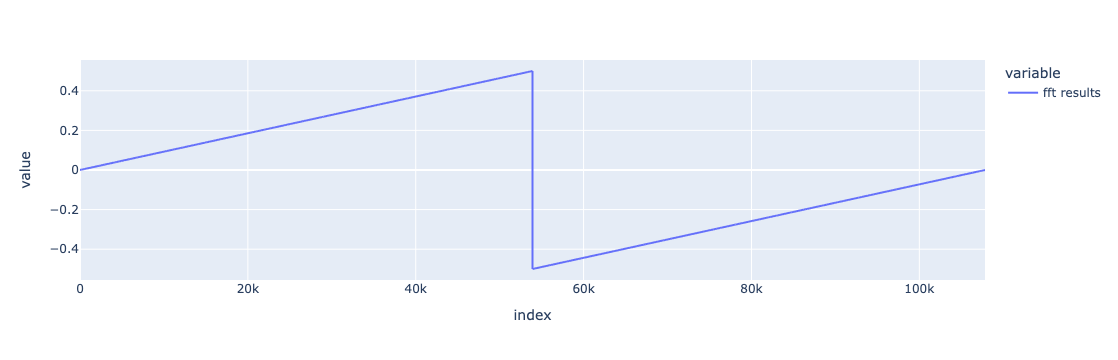

In [54]:
fig = px.line(sample_freq)
fig.show()

## 第六步：变量平稳性分析
针对变量平稳性的分析可以展示数据中的异常变化与波动。

目前包含的平稳性分析方法有：
- ADF
- Phillips-Perron
- DF-GLS
- KPSS
- Zivot-Andrew
- Variance Ratio

In [55]:
# 获取ADF平稳性测试结果
DA.getADF(start_col='pac',end_col='pac')

{'pac': {'Test Statistic': -38.97184925525814,
  'P-value': 0.0,
  'Lags': np.int64(68),
  'Trend': 'c',
  'Summary': <class 'statsmodels.iolib.summary.Summary'>
  """
     Augmented Dickey-Fuller Results   
  Test Statistic                -38.972
  P-value                         0.000
  Lags                               68
  -------------------------------------
  
  Trend: Constant
  Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
  Null Hypothesis: The process contains a unit root.
  Alternative Hypothesis: The process is weakly stationary.
  """}}

In [56]:
# 获取Phillips-Perron平稳性测试结果
DA.getPhillipsPerron(start_col='pac',end_col='pac')

{'pac': {'Test Statistic': np.float64(-81.72586475204753),
  'P-value': 0.0,
  'Lags': 69,
  'Trend': 'c',
  'Summary': <class 'statsmodels.iolib.summary.Summary'>
  """
       Phillips-Perron Test (Z-tau)    
  Test Statistic                -81.726
  P-value                         0.000
  Lags                               69
  -------------------------------------
  
  Trend: Constant
  Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
  Null Hypothesis: The process contains a unit root.
  Alternative Hypothesis: The process is weakly stationary.
  """}}

In [57]:
# 获取DF-GLS平稳性测试结果
DA.getDFGLS(start_col='pac',end_col='pac')

{'pac': {'Test Statistic': -34.55455815074198,
  'P-value': 0.0,
  'Lags': np.int64(68),
  'Trend': 'c',
  'Summary': <class 'statsmodels.iolib.summary.Summary'>
  """
        Dickey-Fuller GLS Results      
  Test Statistic                -34.555
  P-value                         0.000
  Lags                               68
  -------------------------------------
  
  Trend: Constant
  Critical Values: -2.57 (1%), -1.94 (5%), -1.62 (10%)
  Null Hypothesis: The process contains a unit root.
  Alternative Hypothesis: The process is weakly stationary.
  """}}